# Tarea: Análisis Exploratorio de Datos - El Arte de Hacer Preguntas
## Alan Robles Gracia A00841816 | Fecha de entrega 16/02/26

El dataset del Titanic consiste en los registros de pasajeros del hundimiento del Titanic en 1912, uno de los desastres marítimos más estudiados de la historia. Más allá del evento en sí, el conjunto de datos es muy valioso para el análisis de datos porque contiene una combinación de variables numéricas y categóricas. Esto lo hace un escenario realista para explorar variación, patrones y posibles relaciones entre variables.

Para un analista de datos es interesante estudiar este dataset porque permite observar cómo factores demográficos y socioeconómicos pudieron influir en la probabilidad de supervivencia. Mi objetivo es identificar si existieron patrones sistemáticos, como diferencias por clase social o grupo etario que expliquen parte del desenlace.

In [15]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Cargar datos
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Primeras filas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Análisis exploratorio

In [17]:
# Resumen estadístico básico
print(titanic.describe())
print(titanic.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

In [18]:
# Valores faltantes
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Parte 1: Variación (¿Cómo varían mis datos?)

Examinen la variación de las variables individuales. Algunas preguntas para comenzar (pero formúlenlas en sus propios términos):

¿Cómo se distribuye la edad de los pasajeros? ¿Hay grupos etarios claramente definidos?
¿Cuál es el patrón de tarifas (Fare)? ¿Hay valores atípicos? ¿Por qué podrían existir?
¿Qué proporción de pasajeros sobrevivió? ¿Es lo que esperarías históricamente?
Su trabajo: Elijan 2-3 variables y exploren su variación. Para cada una:

Hagan al menos una visualización apropiada
Describan qué observan (patrones, outliers, valores inusuales)
Formulen una hipótesis sobre por qué ven ese patrón


### **Edad** - ¿La distribución de edad presenta multimodalidad o se concentra en un rango dominante?

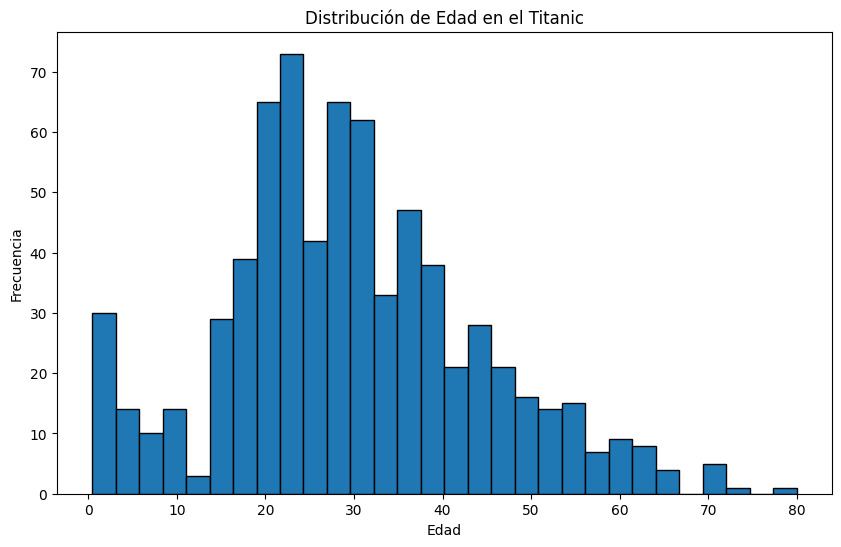

In [19]:
# Distribución de Edad
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad en el Titanic')
plt.show()

La distribución es asimétrica positiva ligera, con una mayor concentración entre 20 y 35 años.
También hay un grupo visible de niños con mucha frecuencia (0–10 años). Por otro lado, hay pocos pasajeros mayores de 65 años. Como observación, existen valores faltantes (alrededor del 20%).

El pico entre 20–35 años puede deberse, en primer lugar, a una mayor proporción de pasajeros económicamente activo, y en segundo a una migración laboral hacia EE.UU.


La baja proporción de adultos mayores puede reflejar una menor esperanza de vida en 1912, además de una menor capacidad económica para viajar en transatlánticos.

Los valores faltantes pueden concentrarse en la tercera clase, donde los registros eran menos precisos

###**Tarifa (fare)** ¿Existen valores extremos que distorsionen la media?

¿La mediana representa mejor el centro de la distribución que la media?

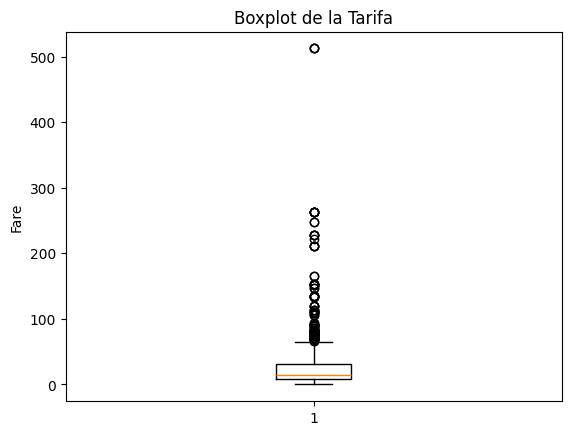

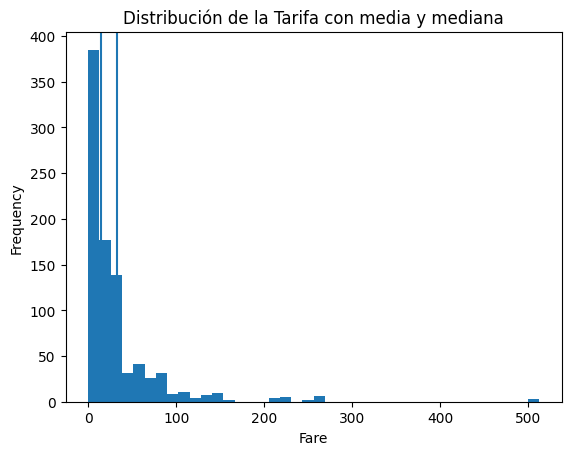

(np.float64(32.204207968574636), 14.4542)

In [21]:
# Boxplot para detectar valores extremos
plt.figure()
plt.boxplot(titanic["Fare"].dropna())
plt.title("Boxplot de la Tarifa")
plt.ylabel("Fare")
plt.show()


# Distribución de una variable continua: Fare
fare_mean = titanic["Fare"].mean() # graficamos la media
fare_median = titanic["Fare"].median() # graficamos la medaiana
plt.figure()
plt.hist(titanic["Fare"].dropna(), bins=40)
plt.axvline(fare_mean)
plt.axvline(fare_median)
plt.title("Distribución de la Tarifa con media y mediana")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

fare_mean, fare_median # imprimimos valores


El boxplot muestra múltiples outliers superiores, por encima de los $100, incluyendo tarifas extremadamente altas (~500). Esto nos dice que la distribución tiene una cola pesada hacia la derecha (right-skewed).

La media es 31.41 y la mediana es 14.45, por lo que la media está siendo empujada hacia arriba por estos valores extremos. Debido al sesgo positivo observado en el histograma, la mediana es un estimador más representativo del “pasajero típico”

La distribución parece reflejar una  estratificación social donde muchos pasajeros con recursos limitados viajan en tercera clase y un grupo pequeño con alto poder adquisitivo lo hacen en primera clase. Lo que nos lleva a pensar que la variación en las tarifas es consecuencia de la estructura socioeconómica de la época. Por otro lado, los valores extremos corresponden a pasajeros de primera clase que ocuparon suites de lujo o compraron boletos familiares.

# Parte 2: Covariación (¿Cómo se relacionan las variables?)

Exploren la covariación entre pares de variables. Ejemplos de preguntas (formulen las suyas):

¿La tasa de supervivencia fue diferente entre clases sociales?
¿Hubo diferencias de supervivencia por género? ¿Y si consideramos clase Y género simultáneamente?
¿Los pasajeros más jóvenes tenían más probabilidad de sobrevivir?
¿El tamaño de la familia (SibSp + Parch) afectó la supervivencia?
Su trabajo: Exploren al menos 3 relaciones entre variables. Para cada una:

Formulen una pregunta específica
Elijan la visualización apropiada (scatter, boxplot, barplot, heatmap, etc.)
Interpreten lo que observan
Conecten sus hallazgos con lo que saben del contexto histórico

1- **Tasa de supervivencia x Género + Edad**

¿La probabilidad de supervivencia varía por género a lo largo de los distintos grupos de edad?
Más concretamente:
Esta probabilidad, ¿es consistente con el efecto de “mujeres y niños primero”?

/tmp/ipython-input-3294577151.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic.groupby(["Age_group", "Sex"])["Survived"].mean().unstack()


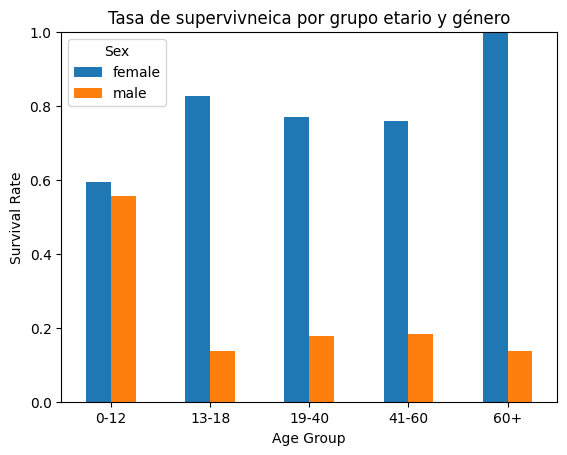

In [27]:
# Crear grupos de edad
bins = [0, 12, 18, 40, 60, 100]
labels = ["0-12", "13-18", "19-40", "41-60", "60+"]
titanic["Age_group"] = pd.cut(titanic["Age"], bins=bins, labels=labels, right=False)

# Calcular tasa de supervivencia por grupo etario y género
survival_rates = titanic.groupby(["Age_group", "Sex"])["Survived"].mean().unstack()

# Bar chart
survival_rates.plot(kind="bar")

plt.title("Tasa de supervivneica por grupo etario y género")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

En generak, las mujeres tienen una tasa de supervivencia significativamente mayor que los hombres. Además, en niños pequeños (menores de 12), la diferencia entre géneros prácticamente desaparece, aparte de que ambos sexos presentan tasas relativamente altas. Entonces, respondiendo a la pregunta, sí, se observa claramente el efecto de niños y mujeres primero en la tasa de supervivencia. Como observación, en adultos mayores la diferencia mayor.

Investigando un poco, esto es coherente con el contexto del hundimiento en donde la evacuación priorizó mujeres y niños, y los hombres adultos, especialmente en tercera clase, tuvieron menor acceso a botes.

**2. Diferencia tasa de supervivencia entre sexxos, por cada clase social**

La diferencia observada en la tasa de supervivencia entre sexos, ¿se mantiene igual por clase social?

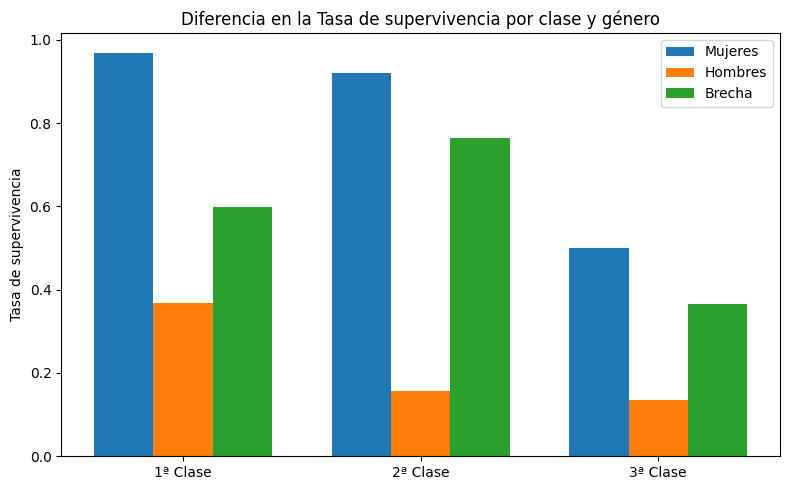

In [77]:
# Calculamos la diferencia en la tasa de supervivencia
survival_rates = titanic.groupby(["Pclass", "Sex"])["Survived"].mean().unstack()
gender_gap = survival_rates["female"] - survival_rates["male"]

x = np.arange(3)
width = 0.25

#Graficamos las tasas, y la diferencia de las tasas por clase
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width, survival_rates["female"], width, label="Mujeres")
ax.bar(x,         survival_rates["male"],   width, label="Hombres")
ax.bar(x + width, gender_gap.values,        width,  label="Brecha")

ax.set_xticks(x)
ax.set_xticklabels(["1ª Clase", "2ª Clase", "3ª Clase"])
ax.set_ylabel("Tasa de supervivencia")
ax.legend()

plt.title("Diferencia en la Tasa de supervivencia por clase y género")
plt.tight_layout()
plt.show()

Lo que observamos es que la diferencia en las tasas es mayor para la 2ª clase (casi 80% de diferencia), seguido por la 1ª (60%), finalizando con la 3ª con una diferencia >40%.

Esto es muy interesante porque con un poco de información, se pude reflejar la dinámica de cada clase a la hora del accidente. En primer lugar, para la segunda clase vemos como las mujeres sí lograron acceder a los botes, pero los hombres tuvieron una tasa de supervivencia muy baja.

Para la primera clase, aunque la brecha es grande, algunos hombres sí sobrevivieron (por conexiones, estatus, acceso temprano), lo que redujo ligeramente la diferencia.

Por otro lado, tanto hombres como mujeres de 3ª clase tuvieron tasas más bajas. Lo que nos dice que las mujeres de 3ª no sobrevivieron tanto como las de 1ª o 2ª. Entonces la diferencia disminuye no porque los hombres sobrevivieran más, sino porque las mujeres sobrevivieron menos.

**3. Clase x Supervivencia**

¿Qué tanto cambió (si es que lo hizo) el ratio entre sobrevivientes - fallecidos entre clases sociales?

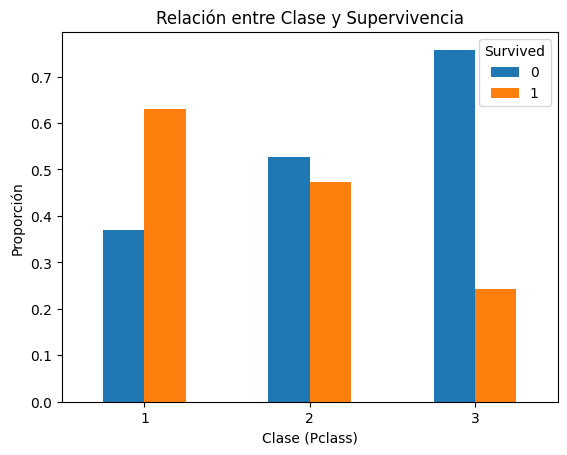

In [84]:
# Crear tabla cruzada
survival_by_class = pd.crosstab(titanic["Pclass"], titanic["Survived"])

# Convertir a proporciones por clase
survival_rate = survival_by_class.div(survival_by_class.sum(axis=1), axis=0)

# Graficar
survival_rate.plot(kind="bar")

plt.title("Relación entre Clase y Supervivencia")
plt.xlabel("Clase (Pclass)")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.show()

Como se podría suponer, el gráfico evidencia una clara diferencia entre ratio sobrevivientes - fallecidos.

-Primera clase (Pclass = 1) ~63% sobrevivió, ~37% murió.La mayoría de los pasajeros de primera clase sobrevivieron.

-Segunda clase (Pclass = 2) ~47% sobrevivió, ~53% murió. Aquí la supervivencia es casi equilibrada, con ligera mayoría de fallecidos.

-Tercera clase (Pclass = 3) ~24% sobrevivió, ~76% murió. La gran mayoría de pasajeros de tercera clase no sobrevivió.

Esto se debe a tres razones principales:

Por la ubicación, la primera clase estaba en cubiertas superiores. Por su parte la tercera clase estaba en cubiertas inferiores.Durante el hundimiento, el acceso a los botes salvavidas era más rápido para quienes estaban arriba.

También pudo influir el acceso a información y recursos, pues los pasajeros de primera clase recibieron aviso más temprano y tenían mayor cercanía a la tripulación.

Por último la evacuación favoreció  a quienes tenían mejor posición social.

# Parte 3: Valores Faltantes



¿Qué variables tienen valores faltantes?

In [69]:
titanic.isnull().sum()[titanic.isnull().sum() > 0]

,0
Age,177
Cabin,687
Embarked,2
Age_group,177


La edad, la cabina (la mayoría de los vlaores), y unos pocos de la embarcación.

El grupo por edad al ser una variable creada a partir de la edad, presenta los mismos valores faltantes

<Axes: >

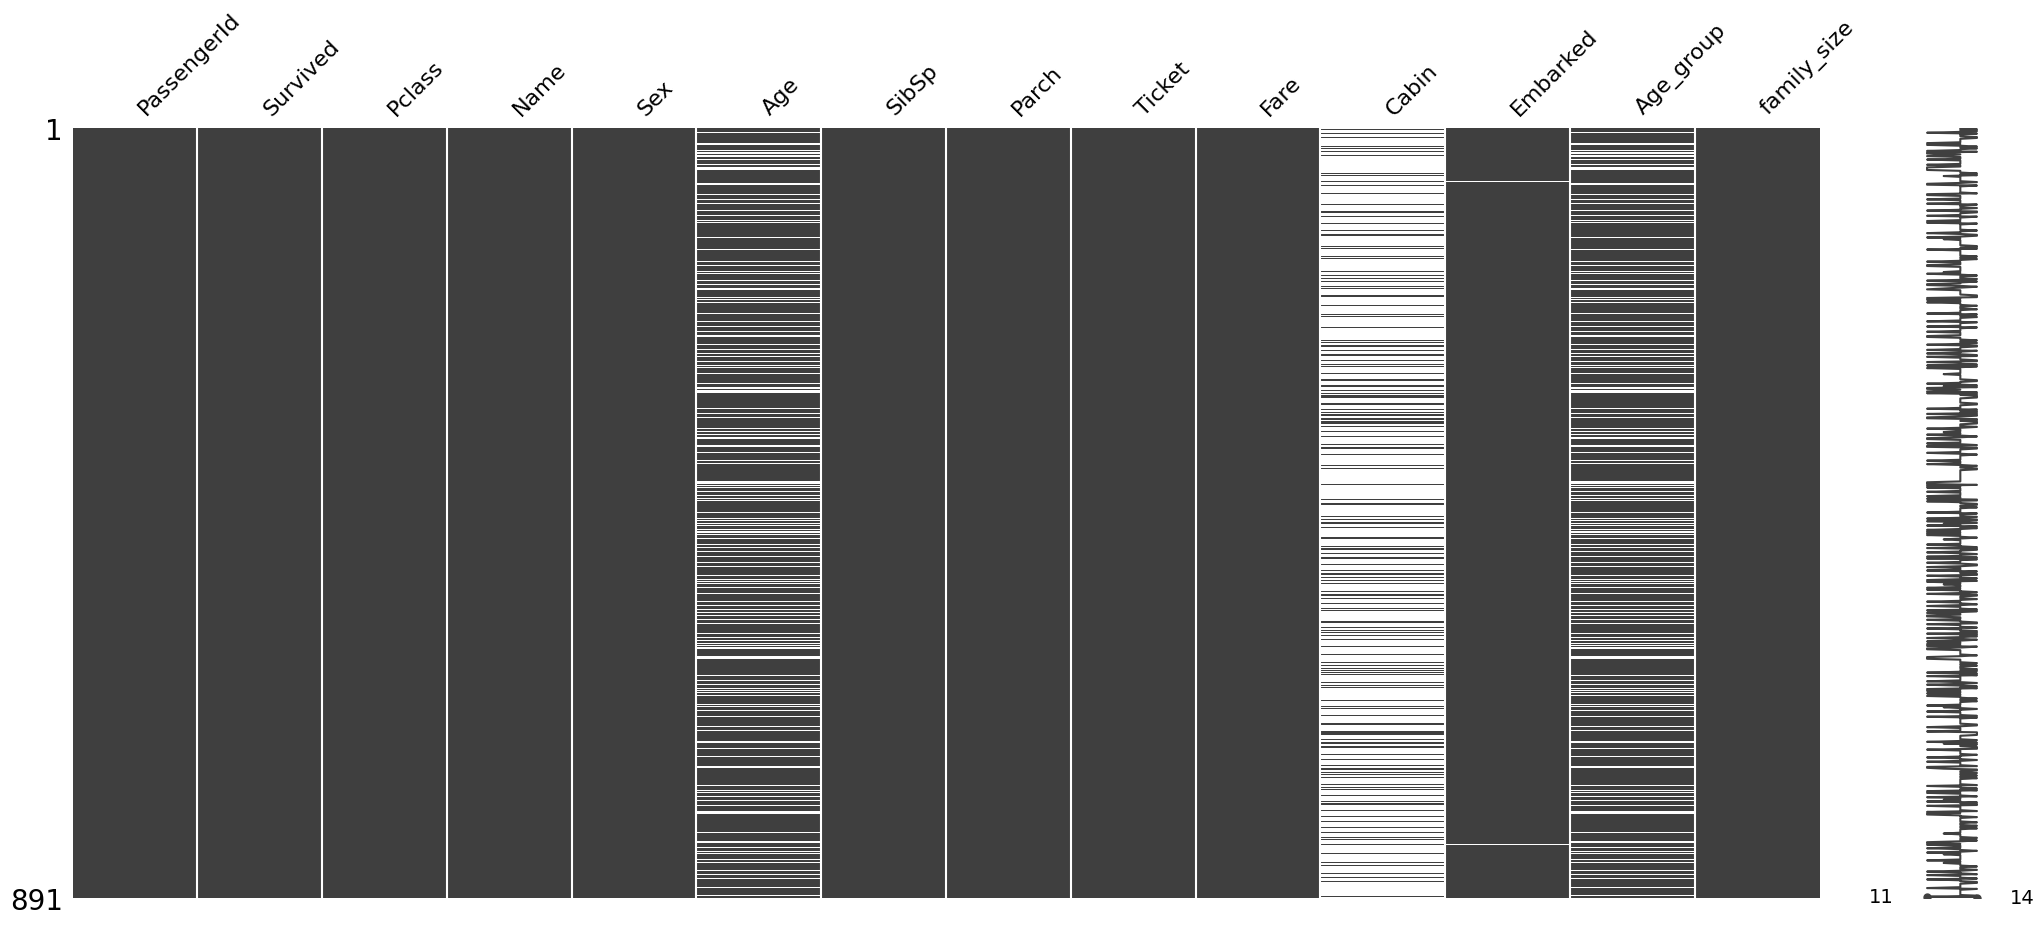

In [71]:
# Visualizar patrón de valores faltantes
import missingno as msno
msno.matrix(titanic)

Para responder algunas preguntas sobre los valores faltantes, hacemos lo siguientes gráficos

1. ¿Edad faltante afecta supervivencia?

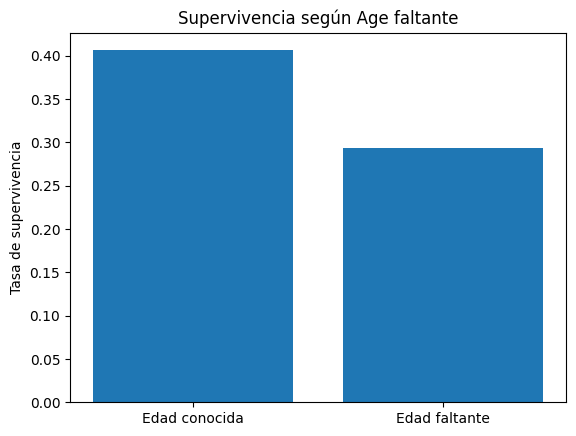

In [79]:
# Creamos el grupo de aquellos con Age faltante
age_missing = titanic["Age"].isnull()
surv_by_age_missing = titanic.groupby(age_missing)["Survived"].mean()

# Graficar
plt.figure()
plt.bar(["Edad conocida", "Edad faltante"], surv_by_age_missing.values)

plt.title("Supervivencia según Age faltante")
plt.ylabel("Tasa de supervivencia")
plt.show()

Age (177 faltantes): No son aleatorios. Los pasajeros sin edad registrada tienen una tasa de supervivencia notablemente menor que los que sí la tienen

2. ¿Faltan edades más en alguna clase?

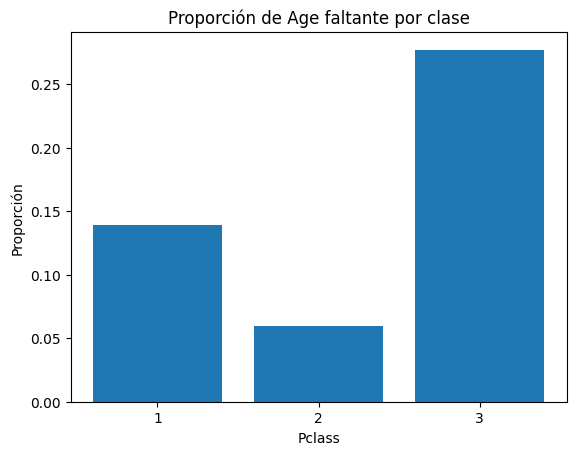

In [80]:
# Creamos el grupo de pasajeros faltantes por clase
missing_by_class = titanic.groupby("Pclass")["Age"].apply(lambda x: x.isnull().mean())

# Graficar
plt.figure()
plt.bar(["1", "2", "3"], missing_by_class.values)

plt.title("Proporción de Age faltante por clase")
plt.ylabel("Proporción")
plt.xlabel("Pclass")
plt.show()

La 3ª clase tiene una proporción mucho mayor de edades faltantes, lpodemos suponer que se registraba menos información de pasajeros de clase baja.

3. ¿Sobrevivieron los pasajeros con Embarked faltante?

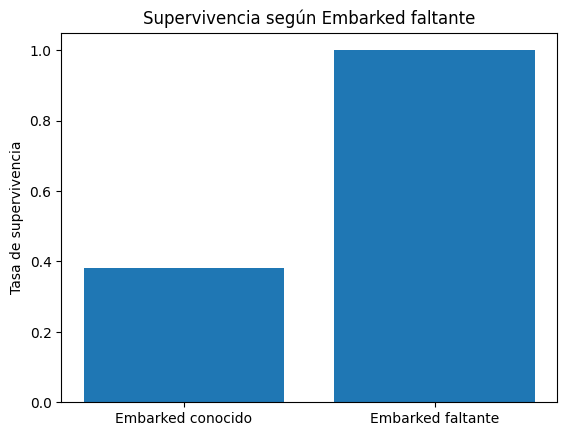

In [85]:
# Hallamos pasajeros con embarque faltante
emb_missing = titanic["Embarked"].isnull()
surv_by_emb = titanic.groupby(emb_missing)["Survived"].mean()

# Graficar
plt.figure()
plt.bar(["Embarked conocido", "Embarked faltante"], surv_by_emb.values)

plt.title("Supervivencia según Embarked faltante")
plt.ylabel("Tasa de supervivencia")
plt.show()

Sí, los 2 pasajeros que sobrevivieron

**¿Cómo manejarían estos valores faltantes? Justifiquen su respuesta.**

En el caso de la edad, como está muy relacionada con la clase y género, lo que haría con los valores faltantes sería asignarle la mediana de la edad para ese grupo (sexo x clase)

Lo que no haría sería asignarle la media, ya que aumenta el sesgo, ni eliminar esas columnas, ya que son demasiados valores y se perdería demasiada información.

En el caso del embarque, al ser 2 casos únicamente, pensaría en asignarle la moda, por ser una variable categórica, o directamente eliminaría esas columnas.

El caso de la cabina es mucho más complicado, ya que representa un gran porcentaje de los datos (casi el 80%) y no hay una forma para asignarle cabinas, ya que hay muchos valores distintos. Lo que se me ocurre para no perder información es crear una nueva variable binaria si se tiene una columna asignada, ya que tener cabina asignada puede estar correlacionado con la clase social.


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

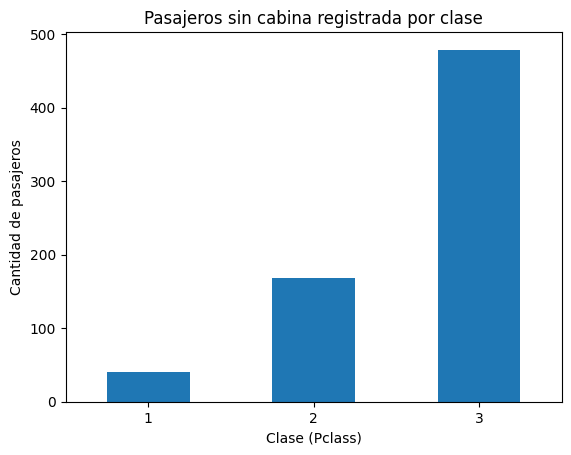

In [83]:
# Crear variable binaria
titanic["HasCabin"] = titanic["Cabin"].notna().astype(int)

# Filtrar pasajeros sin cabina
no_cabin = titanic[titanic["HasCabin"] == 0]

# Contar por clase
no_cabin_counts = no_cabin["Pclass"].value_counts().sort_index()

# Graficar
no_cabin_counts.plot(kind="bar")

plt.title("Pasajeros sin cabina registrada por clase")
plt.xlabel("Clase (Pclass)")
plt.ylabel("Cantidad de pasajeros")
plt.xticks(rotation=0)

Efectivamente, la nueva variable "HasCabin" es útil ya que hay una evdencia clara de correlación entre la clase social y no tener una cabina asignada

# Parte 4: Una pregunta propia

Esta es la parte más importante. Formulen una pregunta original sobre el dataset que les parezca interesante y que no hayan visto en ejemplos de internet o tutoriales. Algunos criterios:

La pregunta debe requerir relacionar al menos 2 variables
Debe ser respondible con los datos disponibles
Debe requerir cierto razonamiento, no solo hacer una gráfica
Ejemplos de buenas preguntas:

"¿Los pasajeros que viajaban solos tuvieron diferente tasa de supervivencia que los que viajaban en familia?"
"¿Hubo un efecto de 'mujeres y niños primero' que variara según la clase social?"

**Tamaño de familia x Tasa de supervivencia**

# ¿Existe un tamaño “óptimo” de familia para una mayor supervivencia?

Podríamos esperar que:

Pasajeros solos tengan menor supervivencia (menos apoyo social) o mayor (más facilidad para caber en los barcos).

Familias pequeñas (2–4 personas) tengan mayor supervivencia (mayor facildad de caber + una clase social superior).

Familias muy grandes tengan menor supervivencia por complejidad al evacuar.

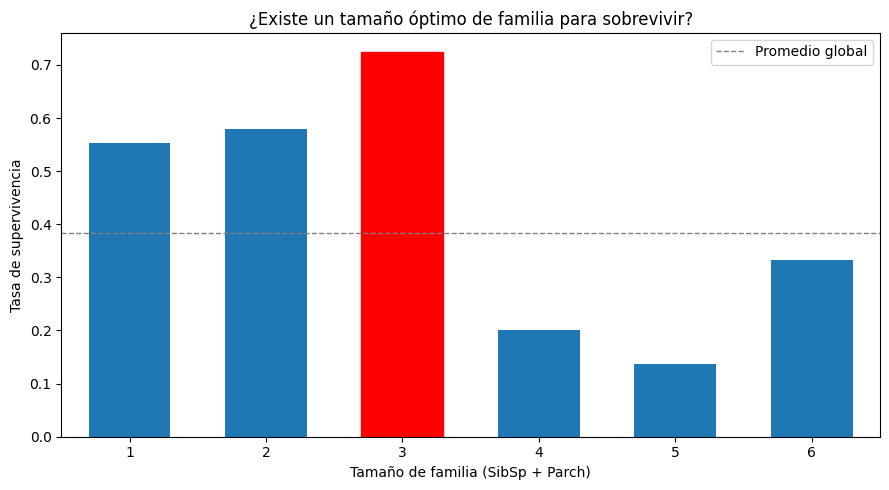

In [88]:
# Defininmos tmaño de familia como la suma de SibSp + Parch
titanic["family_size"] = titanic["SibSp"] + titanic["Parch"]

# Hallamos los supervivientes por tamaño
survival = titanic.groupby("family_size")["Survived"].mean()

#Graficar
fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(survival.index, survival.values, width=0.6)

# Colorear el óptimo
optimal = survival.idxmax()
bars[optimal].set_color("red")

ax.set_xticks(survival.index)
ax.set_xlabel("Tamaño de familia (SibSp + Parch)")
ax.set_ylabel("Tasa de supervivencia")
ax.set_title("¿Existe un tamaño óptimo de familia para sobrevivir?")
ax.set_xlim(0.5,6.5)

# Línea de referencia: tasa global
ax.axhline(titanic["Survived"].mean(), color="gray", linestyle="--", linewidth=1, label="Promedio global")
ax.legend()

plt.tight_layout()
plt.show()

Este me pareció muy interesante, ya que el gráfico sugiere que el tamaño óptimo es 3 personas (SibSp + Parch = 3), con una tasa cercana al 70%, muy por encima del promedio global (~38%).

También los tamaños 1 y 2 están por encima del promedio. En cambio, los tamaños 4 y 5 tienen una caída drástica. Especialmente para el tamaño 5 es el más bajo (~15%).

Pensando un poco como se dio la evacuación del barco:

Para las familias pequeñas (2–3 personas), Eran más fáciles de coordinar. Por ejemplo había una mayor probabilidad de que madre + 1 o 2 hijos pudieran abordar juntos. Lo que explica por qué el tamaño 2–3 tiene tasas altas.

Por otro lado, para las familas más grande (4-6 personas), no había espacio suficiente para todos juntos, por lo que hubo separaciones forzadas. También pienso en que hubo padres intentando no abandonar hijos, y posible retrasos en la evacuación al intentar reagruparse.

Por último, curiosamente, el tamaño 1 tiene tasa relativamente alta (~55%). Esto puede deberse a que: muchas mujeres viajaban solas como empleadas o migrantes, no dependían de coordinación familiar, y podían moverse más rápido hacia los botes.

Por otro lado, la razón principal que se me ocurre para "bajar la tasa" para que el tamaño 1 no tenga la tasa más alta, es que las personas con una clase social más baja, al tener un poder adquisitivo más bajo, viajen solas (sin hijos o parejas), lo que haría que las familias pequeñas (con poder adquisitvo
más alto para compra más boletos) sean la combinación perfecta para sobrevivir, es decir, cantidad pequeña > 1 + clase social + alta.



# Reflexión

Creo que lo más difícil de este análisis fueron dos cosas: 1) pasar de un grupo de datos con ciertas variables a una pregunta bien formulada, interesante y que se pueda responder y 2) una vez ya formulada la pregunta, elegir la visualización correcta que la pudiera responder. Y es esto lo que siento que hace que uno como científico de datos sobresalga, aparte de la interpretación de los gráficos, que también es esencial, ser capaz de formular y responder correctamente perguntas, que sirvan para explorar y entender mejor los datos y las variables.

De este EDA aprendo cómo formular preguntas interesante sobre los datos, leggar a una respuesta mediante visualizaciones, interpretar estas respuestas y, en base a ello, formular nuevas preguntas, que puedan ser más precisas, más interesantes, más "reveladoras" o simplemente diferentes.